In [1]:
!pip install keras

In [50]:
#Librerias
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import random
from shutil import rmtree
import tensorflow as tf
from keras.callbacks import TensorBoard
from keras.utils import to_categorical
#from keras_preprocessing.image import load_img, img_to_array, array_to_img, save_img
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import os
import seaborn as sns
from keras.applications.vgg19 import VGG19
from sklearn import svm
import sklearn
from sklearn.model_selection import train_test_split
#########################################################

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import make_scorer

MCC_scorer = make_scorer(matthews_corrcoef)
#######################################################

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#NHS TIPO NIC1 SEG
#307
image_ids_array = ['I264211_C1.jpg', 'I169320_C2.jpg', 'I166612_C1.jpg', 'I169320_C1.jpg', 'I166612_C2.jpg', 'I150818_C2.jpg', 'I150818_C1.jpg', 'I149745_C2.jpg', 'I149745_C1.jpg', 'I133591_C2.jpg', 'I126100_C1.jpg', 'I133591_C1.jpg', 'I126100_C2.jpg', 'I124361_C1.jpg', 'I103738_C1.jpg', 'I103738_C2.jpg', 'I124361_C2.jpg', 'I124032_C2.jpg', 'I124032_C1.jpg', 'I264211_C2.jpg', 'I342192_C2.jpg', 'I342192_C1.jpg', 'I339977_C2.jpg', 'I335731_C2.jpg', 'I326517_C1.jpg', 'I324210_C2.jpg', 'I339977_C1.jpg', 'I335731_C1.jpg', 'I326517_C2.jpg', 'I324210_C1.jpg', 'I298042_C2.jpg', 'I295650_C1.jpg', 'I295650_C2.jpg', 'I293440_C1.jpg', 'I274386_C2.jpg', 'I293440_C2.jpg', 'I313616_C2.jpg', 'I298042_C1.jpg', 'I313616_C1.jpg', 'I274386_C1.jpg', 'I522521_C1.jpg', 'I517492_C2.jpg', 'I493937_C1.jpg', 'I493937_C2.jpg', 'I517492_C1.jpg', 'I505766_C2.jpg', 'I505766_C1.jpg', 'I474789_C1.jpg', 'I478042_C1.jpg', 'I478042_C2.jpg', 'I474789_C2.jpg', 'I466728_C2.jpg', 'I466728_C1.jpg', 'I437637_C1.jpg', 'I437637_C2.jpg', 'I371059_C2.jpg', 'I368134_C2.jpg', 'I368134_C1.jpg', 'I371059_C1.jpg', 'I352381_C2.jpg', 'I352381_C1.jpg', 'I635482_C1.jpg', 'I633710_C1.jpg', 'I633710_C2.jpg', 'I630618_C1.jpg', 'I630618_C2.jpg', 'I608976_C2.jpg', 'I608935_C1.jpg', 'I608976_C1.jpg', 'I608935_C2.jpg', 'I595301_C2.jpg', 'I592231_C2.jpg', 'I592231_C1.jpg', 'I595301_C1.jpg', 'I584458_C1.jpg', 'I584458_C2.jpg', 'I580816_C1.jpg', 'I580149_C1.jpg', 'I580816_C2.jpg', 'I580149_C2.jpg', 'I545787_C2.jpg', 'I579989_C1.jpg', 'I535966_C2.jpg', 'I545787_C1.jpg', 'I579989_C2.jpg', 'I535966_C1.jpg', 'I527027_C1.jpg', 'I527027_C2.jpg', 'I522521_C2.jpg', 'I743469_C1.jpg', 'I743435_C2.jpg', 'I704275_C2.jpg', 'I743333_C1.jpg', 'I677963_C1.jpg', 'I702418_C1.jpg', 'I691209_C2.jpg', 'I743333_C2.jpg', 'I702418_C2.jpg', 'I704275_C1.jpg', 'I691209_C1.jpg', 'I677963_C2.jpg', 'I662039_C1.jpg', 'I643611_C1.jpg', 'I672531_C1.jpg', 'I662039_C2.jpg', 'I672531_C2.jpg', 'I668441_C2.jpg', 'I668441_C1.jpg', 'I643611_C2.jpg', 'I635482_C2.jpg', 'I743893_C1.jpg', 'I743892_C2.jpg', 'I743892_C1.jpg', 'I743874_C1.jpg', 'I743834_C2.jpg', 'I743874_C2.jpg', 'I743834_C1.jpg', 'I743827_C2.jpg', 'I743714_C2.jpg', 'I743827_C1.jpg', 'I743704_C2.jpg', 'I743635_C2.jpg', 'I743624_C1.jpg', 'I743624_C2.jpg', 'I743635_C1.jpg', 'I743507_C1.jpg', 'I743507_C2.jpg', 'I743622_C2.jpg', 'I743550_C1.jpg', 'I743622_C1.jpg', 'I743476_C2.jpg', 'I744362_C1.jpg', 'I744351_C1.jpg', 'I744351_C2.jpg', 'I744335_C2.jpg', 'I744345_C2.jpg', 'I744345_C1.jpg', 'I744294_C2.jpg', 'I744335_C1.jpg', 'I744294_C1.jpg', 'I744206_C2.jpg', 'I744175_C1.jpg', 'I744206_C1.jpg', 'I744114_C2.jpg', 'I744131_C1.jpg', 'I744175_C2.jpg', 'I744129_C1.jpg', 'I744131_C2.jpg', 'I744129_C2.jpg', 'I744114_C1.jpg', 'I744029_C2.jpg', 'I743893_C2.jpg', 'I743951_C2.jpg', 'I743951_C1.jpg', 'I744029_C1.jpg', 'I744074_C2.jpg', 'I744074_C1.jpg', 'I744068_C2.jpg', 'I744068_C1.jpg', 'I744722_C1.jpg', 'I744694_C2.jpg', 'I744691_C2.jpg', 'I744694_C1.jpg', 'I744691_C1.jpg', 'I744599_C2.jpg', 'I744606_C2.jpg', 'I744606_C1.jpg', 'I744624_C2.jpg', 'I744624_C1.jpg', 'I744599_C1.jpg', 'I744548_C2.jpg', 'I744457_C2.jpg', 'I744443_C2.jpg', 'I744472_C2.jpg', 'I744457_C1.jpg', 'I744548_C1.jpg', 'I744406_C2.jpg', 'I744472_C1.jpg', 'I744406_C1.jpg', 'I744443_C1.jpg', 'I744362_C2.jpg', 'I745157_C1.jpg', 'I745139_C2.jpg', 'I745136_C2.jpg', 'I745139_C1.jpg', 'I745136_C1.jpg', 'I745096_C2.jpg', 'I745085_C2.jpg', 'I745092_C2.jpg', 'I745096_C1.jpg', 'I745092_C1.jpg', 'I745024_C2.jpg', 'I745047_C2.jpg', 'I745047_C1.jpg', 'I745085_C1.jpg', 'I745024_C1.jpg', 'I744912_C2.jpg', 'I744912_C1.jpg', 'I744778_C2.jpg', 'I744751_C2.jpg', 'I744751_C1.jpg', 'I744722_C2.jpg', 'I744732_C2.jpg', 'I744778_C1.jpg', 'I744732_C1.jpg', 'I745824_C2.jpg', 'I745838_C2.jpg', 'I745838_C1.jpg', 'I745847_C1.jpg', 'I745796_C1.jpg', 'I745824_C1.jpg', 'I745791_C2.jpg', 'I745796_C2.jpg', 'I745756_C1.jpg', 'I745743_C1.jpg', 'I745709_C1.jpg', 'I745308_C1.jpg', 'I745543_C1.jpg', 'I745308_C2.jpg', 'I745562_C1.jpg', 'I745484_C2.jpg', 'I745290_C1.jpg', 'I745266_C1.jpg', 'I745290_C2.jpg', 'I745266_C2.jpg', 'I745232_C2.jpg', 'I745157_C2.jpg', 'I745165_C2.jpg', 'I745165_C1.jpg', 'I745232_C1.jpg', 'I746524_C1.jpg', 'I746431_C1.jpg', 'I746360_C2.jpg', 'I746360_C1.jpg', 'I746308_C2.jpg', 'I746308_C1.jpg', 'I746274_C2.jpg', 'I746259_C1.jpg', 'I746123_C1.jpg', 'I746123_C2.jpg', 'I746174_C2.jpg', 'I746072_C1.jpg', 'I746035_C2.jpg', 'I746035_C1.jpg', 'I746072_C2.jpg', 'I745983_C2.jpg', 'I745930_C2.jpg', 'I745957_C1.jpg', 'I745930_C1.jpg', 'I745847_C2.jpg', 'I745886_C2.jpg', 'I745957_C2.jpg', 'I745983_C1.jpg', 'I745964_C2.jpg', 'I745964_C1.jpg', 'I745886_C1.jpg', 'I750994_C1.jpg', 'I747684_C1.jpg', 'I751566_C1.jpg', 'I751566_C2.jpg', 'I753457_C1.jpg', 'I750994_C2.jpg', 'I753457_C2.jpg', 'I747104_C2.jpg', 'I747104_C1.jpg', 'I747028_C2.jpg', 'I746771_C2.jpg', 'I746614_C2.jpg', 'I746614_C1.jpg', 'I746692_C2.jpg', 'I746596_C1.jpg', 'I746556_C1.jpg', 'I746566_C2.jpg', 'I746692_C1.jpg', 'I746556_C2.jpg', 'I746539_C1.jpg', 'I746566_C1.jpg', 'I746524_C2.jpg', 'I746539_C2.jpg', 'I746431_C2.jpg', 'I860432_C2.jpg', 'I860432_C1.jpg', 'I858460_C2.jpg', 'I858460_C1.jpg', 'I836429_C2.jpg', 'I845923_C1.jpg', 'I850562_C1.jpg', 'I849456_C2.jpg', 'I850562_C2.jpg', 'I849456_C1.jpg', 'I845923_C2.jpg', 'I836429_C1.jpg', 'I802100_C1.jpg', 'I782433_C1.jpg', 'I810715_C1.jpg', 'I765390_C2.jpg', 'I765390_C1.jpg', 'I763975_C1.jpg', 'I802100_C2.jpg', 'I810715_C2.jpg', 'I763975_C2.jpg', 'I875628_C1.jpg', 'I862260_C1.jpg', 'I875628_C2.jpg', 'I874390_C2.jpg', 'I874390_C1.jpg', 'I862260_C2.jpg']
print(len(image_ids_array))

307


In [6]:
#Cargar Dataset CITOBOT
url="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/PruebasCITOBOT_Anon.csv"
data1 = pd.read_csv(url, header=0)

data1.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data1 = data1.loc[data1['CASE_NUMBER'] <= 'Case 223']
data1['PATH'] = data1['PATH'].str.replace("PruebasCITOBOT_Anon/", "PruebasCITOBOT_AnonSEG/")
data1 = data1[data1['CASE_NUMBER'] != 'Case 169']
data1['DIAGN'] = data1['DIAGN'].replace({3: 2})
data1['DIAGN'] = data1['DIAGN'].replace({4: 2})
data1 = data1[data1['DIAGN'] != 5]
print(data1['DIAGN'].value_counts())
data1

0    265
1    116
2     34
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,Case 001,2,20230411101755.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
1,Case 001,2,20230411101702.jpg,PruebasCITOBOT_AnonSEG/Case 001/,0
2,Case 002,2,20230411100907.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
3,Case 002,2,20230411100934.jpg,PruebasCITOBOT_AnonSEG/Case 002/,0
4,Case 003,2,20230411100207.jpg,PruebasCITOBOT_AnonSEG/Case 003/,0
...,...,...,...,...,...
505,Case 220,2,20230530100347.jpg,PruebasCITOBOT_AnonSEG/Case 220/,1
506,Case 221,2,20230530094711.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
507,Case 221,2,20230530094612.jpg,PruebasCITOBOT_AnonSEG/Case 221/,0
511,Case 223,2,20230530093319.jpg,PruebasCITOBOT_AnonSEG/Case 223/,0


In [7]:
#Cargar Dataset WHO
url2="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/Dataset_WHOSeg.csv"
data2 = pd.read_csv(url2, header=0)

data2.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
data2 = data2.drop(data2[data2.IMAGE_ID == "AAJK5.jpg"].index)
data2['DIAGN'] = data2['DIAGN'].replace({3: 2})
print(data2['DIAGN'].value_counts())
data2

2    464
1    133
0    124
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
717,184.0,AEU,AEU1.jpg,WHO_SEG/IARCImageBankVIA/Case 184/,2
718,185.0,ADF,ADF0.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
719,185.0,ADF,ADF1.jpg,WHO_SEG/IARCImageBankVIA/Case 185/,2
720,186.0,ABK,ABK0.jpg,WHO_SEG/IARCImageBankVIA/Case 186/,2


In [8]:
#Cargar Dataset NCI
url3="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/trainingDatasetSEG.csv"
data3 = pd.read_csv(url3, header=0)

data3.columns = ['PATIENT_IDR', 'IMAGE_ID', 'AGE_GRP', 'WRST_HIST_AFTER', 'WRST_HIST_AFTER_DT', 'HPV_STATUS', 'HPV_DT', 'TIMEPNT', 'PATH']

#Imagenes que no estan segmentadas =================================
data3 = data3.drop(data3[data3.IMAGE_ID == "I770636_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I862299_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I344141_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I741415_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I584615_C2.jpg"].index)
data3 = data3.drop(data3[data3.IMAGE_ID == "I325700_C1.jpg"].index)
#===================================================================

data3 = data3[((data3['PATH'] == 'training_SEG/Biopsy_Study/') & (data3['WRST_HIST_AFTER'].isin([0, 1]))) | ((data3['PATH'] == 'training_SEG/NHS/') & (data3['WRST_HIST_AFTER'] == 0))]
data3 = data3.rename(columns={'WRST_HIST_AFTER': 'DIAGN'})
data3 = data3.rename(columns={'PATIENT_IDR': 'CASE_NUMBER'})
data3 = data3.rename(columns={'AGE_GRP': 'CASE_ID'})
data3 = data3.drop('WRST_HIST_AFTER_DT', axis=1)
data3 = data3.drop('HPV_STATUS', axis=1)
data3 = data3.drop('HPV_DT', axis=1)
data3 = data3.drop('TIMEPNT', axis=1)
data3 = data3.reindex(columns=['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN'])
#dataC1 = data3[data3['DIAGN'] == 0]
#dataC2 = data3[data3['DIAGN'] == 1]
#data_aleatoria = dataC1.sample(n=531)
#data_aleatoria2 = dataC2.sample(n=58)
#data3 = pd.concat([data_aleatoria, data_aleatoria2])
print(data3['DIAGN'].value_counts())
data3

0    531
1    192
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,P100316,2,I389059.jpg,training_SEG/Biopsy_Study/,1
1,P101187,2,I687505.jpg,training_SEG/Biopsy_Study/,0
4,P110406,5,I239297.jpg,training_SEG/Biopsy_Study/,0
5,P111612,5,I545805.jpg,training_SEG/Biopsy_Study/,1
6,P115183,4,I149285.jpg,training_SEG/Biopsy_Study/,0
...,...,...,...,...,...
76652,P899409,5,I325700_C2.jpg,training_SEG/NHS/,0
76653,P899409,5,I553280_C1.jpg,training_SEG/NHS/,0
76654,P899409,5,I553280_C2.jpg,training_SEG/NHS/,0
76655,P899409,5,I853803_C1.jpg,training_SEG/NHS/,0


In [9]:
#Cargar Dataset Kaggle
url4="/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/kaggleDataset_SEG.csv"
data4 = pd.read_csv(url4, header=0)

data4.columns = ['CASE_NUMBER', 'CASE_ID', 'IMAGE_ID', 'PATH', 'DIAGN']
#data4['DIAGN'] = data4['DIAGN'].replace({2: 1})
dataC0 = data4[data4['DIAGN'] == 0]
dataC1 = data4[data4['DIAGN'] == 1]
dataC2 = data4[data4['DIAGN'] == 2]
data_aleatoria0 = dataC0.sample(n=244)
data_aleatoria1 = dataC1.sample(n=574)
data_aleatoria2 = dataC2.sample(n=435)
data4 = pd.concat([data_aleatoria0, data_aleatoria1, data_aleatoria2])
print(data4['DIAGN'].value_counts())
data4

1    574
2    435
0    244
Name: DIAGN, dtype: int64


,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
134,0,0,434.jpg,Kaggle_SEG/Type_1/,0
90,0,0,181.jpg,Kaggle_SEG/Type_1/,0
165,0,0,562.jpg,Kaggle_SEG/Type_1/,0
127,0,0,376.jpg,Kaggle_SEG/Type_1/,0
48,0,0,1251.jpg,Kaggle_SEG/Type_1/,0
...,...,...,...,...,...
1115,0,0,130.jpg,Kaggle_SEG/Type_3/,2
1319,0,0,573.jpg,Kaggle_SEG/Type_3/,2
1428,0,0,875.jpg,Kaggle_SEG/Type_3/,2
1410,0,0,828.jpg,Kaggle_SEG/Type_3/,2


In [10]:
data = pd.concat([data2, data3, data4])
data

,CASE_NUMBER,CASE_ID,IMAGE_ID,PATH,DIAGN
0,14.0,AAHE,AAHE.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
1,14.0,AAHE,AAHE0.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
2,14.0,AAHE,AAHE1.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
3,14.0,AAHE,AAHE3.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
4,14.0,AAHE,AAHE4.jpg,WHO_SEG/IARCImageBankColpo/Case 014/,0
...,...,...,...,...,...
1115,0,0,130.jpg,Kaggle_SEG/Type_3/,2
1319,0,0,573.jpg,Kaggle_SEG/Type_3/,2
1428,0,0,875.jpg,Kaggle_SEG/Type_3/,2
1410,0,0,828.jpg,Kaggle_SEG/Type_3/,2


In [11]:
#Distribuir clases (2)
print(data['DIAGN'].value_counts())

0    899
1    899
2    899
Name: DIAGN, dtype: int64


In [12]:
#Balancear Clase de Salida.
#g = data.groupby('DIAGN')
#dataBal = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
#data = dataBal
#print(data['DIAGN'].value_counts())

In [13]:
#Procesar y Cargar Imagenes

def process_image(filepath):
  img = tf.io.read_file(filepath)
  img = tf.image.decode_jpeg(img)
  img = tf.image.resize(img, [224, 224])
  #img = tf.image.rgb_to_grayscale(img)  # convertir a escala de grises
  img = tf.image.convert_image_dtype(img, tf.float32)  # convertir a tipo float32
  img /= 255.0  # Normalizar píxeles al rango [0, 1]
  img = tf.image.random_flip_left_right(img)  # voltear horizontalmente aleatoriamente
  img = tf.image.random_brightness(img, max_delta=0.1)  # cambiar brillo aleatoriamente
  img = tf.image.random_contrast(img, lower=0.9, upper=1.1)  # cambiar contraste aleatoriamente
  img = tf.image.rot90(img, k=tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32))
  img = tf.image.random_saturation(img, lower=0.7, upper=1.3)
  img = tf.image.random_hue(img, max_delta=0.1)
  img = tf.keras.applications.vgg19.preprocess_input(img)
  return img

In [14]:
#Cargar los path de las imagenes para el pipeline
dataPathDrive = '/content/drive/MyDrive/Colab Notebooks/CITOBOT/DATASET/'
path_data = dataPathDrive + data["PATH"] + data['IMAGE_ID']
path_data = np.array(path_data)

#Convertir en tensores
data_tensor = tf.data.Dataset.from_tensor_slices(path_data)

#Procesar y Cargar Imagenes
data_tensor = data_tensor.map(process_image)

dataset = tf.data.Dataset.from_tensor_slices(to_categorical(data['DIAGN'], 3))
dataset = tf.data.Dataset.zip((data_tensor,dataset))

DATA = dataset.batch(batch_size=64)

# Preprocessing is needed

In [15]:
from keras.applications.vgg19 import VGG19

#Charging VGG19 model

VGG19model = VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG19model.layers:
    layer.trainable = False

## Se quita la capacidad de alterar pesos porque se va a usar
## Al modelo VGG19 previamente entrenado con el dataset
## "Imagenet" y por ello no se deben modificar los pesos de
## las neuronas del modelo.

VGG19model.summary()  #Trainable parameters will be 0

80134624/80134624 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [16]:
feature_extractor = VGG19model.predict(DATA)

43/43 [==============================] - 2569s 60s/step


In [17]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(2697, 25088)


# **Sin Reduccion**

In [18]:
# Aplanar las características extraídas
features_data = feature_extractor.flatten().reshape(feature_extractor.shape[0], -1)
print(features_data.shape)

(2697, 25088)


**UNET 1D**

Iteracion:  1
Epoch 1/300
216/216 [==============================] - 48s 174ms/step - loss: 1.1281 - accuracy: 0.3380 - val_loss: 1.1109 - val_accuracy: 0.2963
Epoch 2/300
216/216 [==============================] - 35s 163ms/step - loss: 1.1056 - accuracy: 0.3420 - val_loss: 1.0882 - val_accuracy: 0.4005
Epoch 3/300
216/216 [==============================] - 35s 162ms/step - loss: 1.1012 - accuracy: 0.3612 - val_loss: 1.0842 - val_accuracy: 0.3981
Epoch 4/300
216/216 [==============================] - 35s 161ms/step - loss: 1.0992 - accuracy: 0.3478 - val_loss: 1.0959 - val_accuracy: 0.3148
Epoch 5/300
216/216 [==============================] - 35s 161ms/step - loss: 1.0947 - accuracy: 0.3635 - val_loss: 1.0933 - val_accuracy: 0.2963
Epoch 6/300
216/216 [==============================] - 35s 161ms/step - loss: 1.0895 - accuracy: 0.3780 - val_loss: 1.0867 - val_accuracy: 0.3380
Epoch 7/300
216/216 [==============================] - 35s 161ms/step - loss: 1.0862 - accuracy: 0.4058 - val_

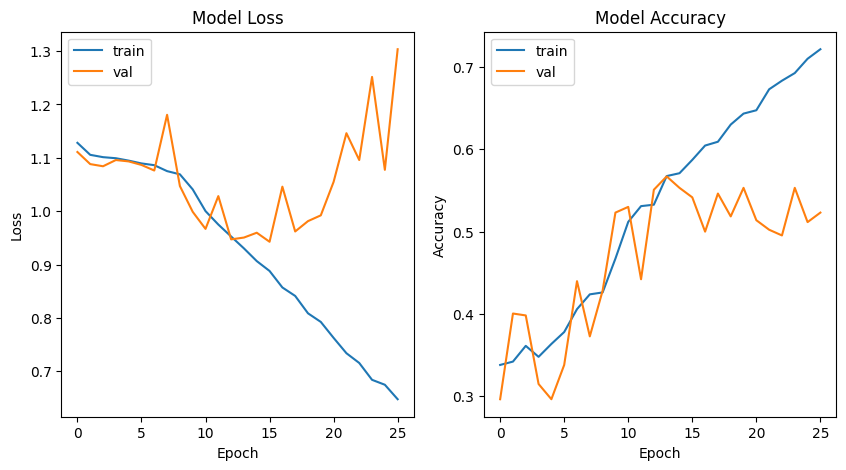

17/17 [==============================] - 8s 322ms/step
Clase 0:
Especificidad: 0.6807909604519774
Sensibilidad: 0.6881720430107527

Clase 1:
Especificidad: 0.8398876404494382
Sensibilidad: 0.3804347826086957

Clase 2:
Especificidad: 0.7648648648648648
Sensibilidad: 0.5


Matriz de Confusión:
[[128  24  34]
 [ 61  70  53]
 [ 52  33  85]]
Specificity:  [0.6807909604519774, 0.8398876404494382, 0.7648648648648648]
Sensitivity:  [0.6881720430107527, 0.3804347826086957, 0.5]
Accuracy:  0.524074074074074
Precision:  [0.53112033 0.5511811  0.49418605]
Recall:     [0.68817204 0.38043478 0.5       ]
F1score:    [0.59953162 0.45016077 0.49707602]
Iteracion:  2
Epoch 1/300
216/216 [==============================] - 42s 167ms/step - loss: 1.2033 - accuracy: 0.3362 - val_loss: 1.0882 - val_accuracy: 0.3773
Epoch 2/300
216/216 [==============================] - 35s 161ms/step - loss: 1.1255 - accuracy: 0.3525 - val_loss: 1.0875 - val_accuracy: 0.3750
Epoch 3/300
216/216 [=============================

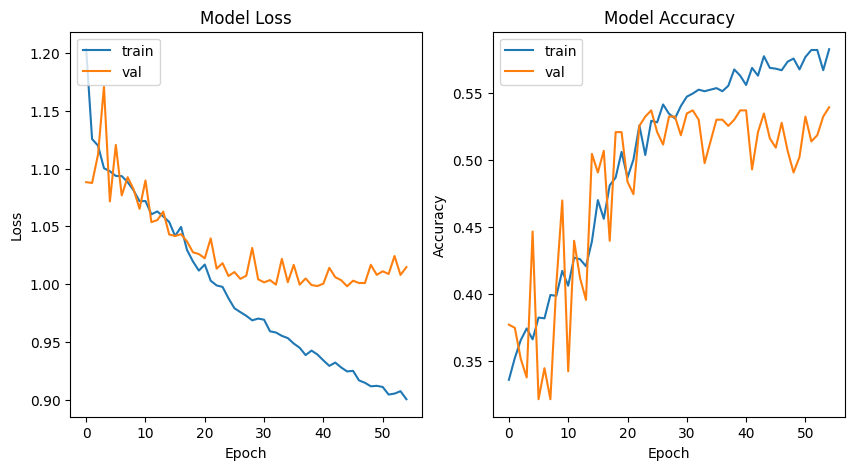

17/17 [==============================] - 4s 197ms/step
Clase 0:
Especificidad: 0.5925925925925926
Sensibilidad: 0.7037037037037037

Clase 1:
Especificidad: 0.7835616438356164
Sensibilidad: 0.3485714285714286

Clase 2:
Especificidad: 0.8516483516483516
Sensibilidad: 0.3977272727272727


Matriz de Confusión:
[[133  36  20]
 [ 80  61  34]
 [ 63  43  70]]
Specificity:  [0.5925925925925926, 0.7835616438356164, 0.8516483516483516]
Sensitivity:  [0.7037037037037037, 0.3485714285714286, 0.3977272727272727]
Accuracy:  0.4888888888888889
Precision:  [0.48188406 0.43571429 0.56451613]
Recall:     [0.7037037  0.34857143 0.39772727]
F1score:    [0.57204301 0.38730159 0.46666667]
Iteracion:  3
Epoch 1/300
216/216 [==============================] - 42s 167ms/step - loss: 1.1542 - accuracy: 0.3206 - val_loss: 1.0978 - val_accuracy: 0.3611
Epoch 2/300
216/216 [==============================] - 35s 160ms/step - loss: 1.1209 - accuracy: 0.3513 - val_loss: 1.0974 - val_accuracy: 0.3611
Epoch 3/300
216/216

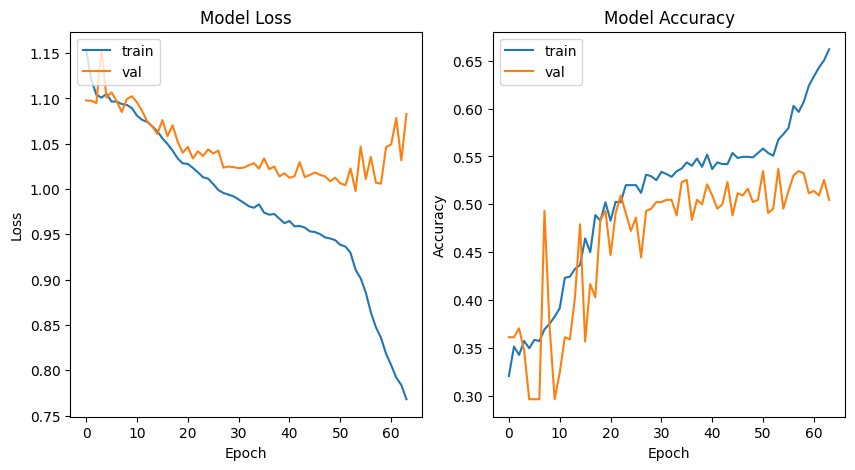

17/17 [==============================] - 4s 196ms/step
Clase 0:
Especificidad: 0.7534246575342466
Sensibilidad: 0.6

Clase 1:
Especificidad: 0.7777777777777778
Sensibilidad: 0.49444444444444446

Clase 2:
Especificidad: 0.7492957746478873
Sensibilidad: 0.4702702702702703


Matriz de Confusión:
[[105  29  41]
 [ 43  89  48]
 [ 47  51  87]]
Specificity:  [0.7534246575342466, 0.7777777777777778, 0.7492957746478873]
Sensitivity:  [0.6, 0.49444444444444446, 0.4702702702702703]
Accuracy:  0.5203703703703704
Precision:  [0.53846154 0.52662722 0.49431818]
Recall:     [0.6        0.49444444 0.47027027]
F1score:    [0.56756757 0.51002865 0.48199446]
Iteracion:  4
Epoch 1/300
216/216 [==============================] - 42s 167ms/step - loss: 1.1369 - accuracy: 0.3409 - val_loss: 1.1124 - val_accuracy: 0.3264
Epoch 2/300
216/216 [==============================] - 35s 162ms/step - loss: 1.1085 - accuracy: 0.3525 - val_loss: 1.1227 - val_accuracy: 0.3519
Epoch 3/300
216/216 [==========================

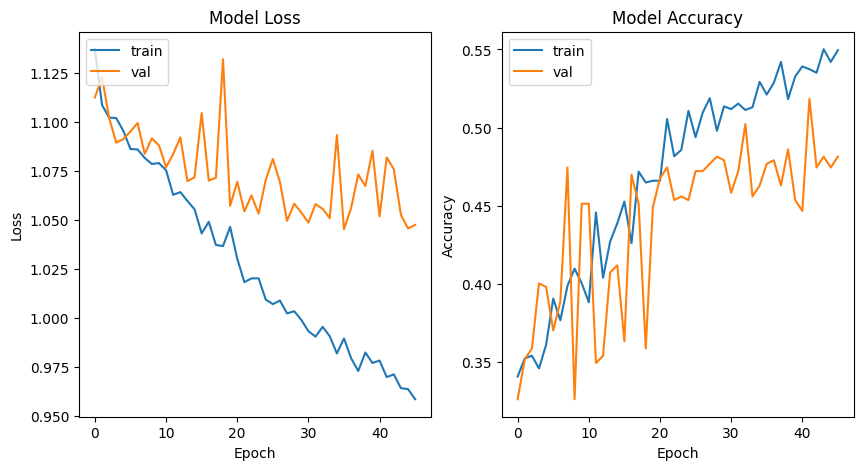

17/17 [==============================] - 4s 199ms/step
Clase 0:
Especificidad: 0.6090651558073654
Sensibilidad: 0.732620320855615

Clase 1:
Especificidad: 0.8677248677248677
Sensibilidad: 0.30864197530864196

Clase 2:
Especificidad: 0.7851002865329513
Sensibilidad: 0.4712041884816754


Matriz de Confusión:
[[137  18  32]
 [ 69  50  43]
 [ 69  32  90]]
Specificity:  [0.6090651558073654, 0.8677248677248677, 0.7851002865329513]
Sensitivity:  [0.732620320855615, 0.30864197530864196, 0.4712041884816754]
Accuracy:  0.512962962962963
Precision:  [0.49818182 0.5        0.54545455]
Recall:     [0.73262032 0.30864198 0.47120419]
F1score:    [0.59307359 0.38167939 0.50561798]
Iteracion:  5
Epoch 1/300
216/216 [==============================] - 42s 167ms/step - loss: 1.1469 - accuracy: 0.3328 - val_loss: 1.0875 - val_accuracy: 0.3889
Epoch 2/300
216/216 [==============================] - 35s 161ms/step - loss: 1.1138 - accuracy: 0.3420 - val_loss: 1.0913 - val_accuracy: 0.3750
Epoch 3/300
216/216 

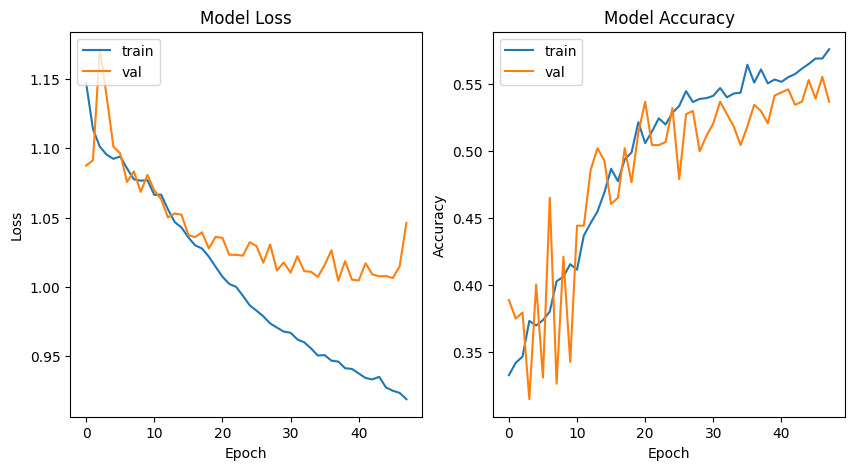

17/17 [==============================] - 4s 197ms/step
Clase 0:
Especificidad: 0.6312849162011173
Sensibilidad: 0.6978021978021978

Clase 1:
Especificidad: 0.8539325842696629
Sensibilidad: 0.3532608695652174

Clase 2:
Especificidad: 0.7868852459016393
Sensibilidad: 0.4942528735632184


Matriz de Confusión:
[[127  24  31]
 [ 72  65  47]
 [ 60  28  86]]
Specificity:  [0.6312849162011173, 0.8539325842696629, 0.7868852459016393]
Sensitivity:  [0.6978021978021978, 0.3532608695652174, 0.4942528735632184]
Accuracy:  0.5148148148148148
Precision:  [0.49034749 0.55555556 0.52439024]
Recall:     [0.6978022  0.35326087 0.49425287]
F1score:    [0.57596372 0.43189369 0.50887574]
Media
Specificity:  [0.65343166 0.8245769  0.7875589 ]  |  Sensitivity:  [0.68445965 0.3770707  0.46669092]
Accuracy:  0.5122222222222221  |  Precision:  0.5154625697465385  |  Recall:  0.5094070913942089  |  F1score:  0.5019649641684413

Desviacion
Specificity:  [0.05815047 0.03696033 0.03490857]  |  Sensitivity:  [0.04475

In [19]:
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Activation, Dropout, BatchNormalization, Conv1DTranspose, concatenate, Input

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


  image_in=Input((x_train.shape[1], 1))

  #contracting path
  conv1=Conv1D(8,3,activation='relu',padding='same')(image_in)
  conv1=Conv1D(8,3,activation='relu',padding='same')(conv1)
  maxp1=MaxPooling1D(1)(conv1)

  conv2=Conv1D(16,3,activation='relu',padding='same')(maxp1)
  conv2=Conv1D(16,3,activation='relu',padding='same')(conv2)
  maxp2=MaxPooling1D(1)(conv2)

  conv3=Conv1D(32,3,activation='relu',padding='same')(maxp2)
  conv3=Conv1D(32,3,activation='relu',padding='same')(conv3)
  maxp3=MaxPooling1D(1)(conv3)

  conv4=Conv1D(64,3,activation='relu',padding='same')(maxp3)
  conv4=Conv1D(64,3,activation='relu',padding='same')(conv4)
  maxp4=MaxPooling1D(pool_size=1)(conv4)

  conv5=Conv1D(128,3,activation='relu',padding='same')(maxp4)
  conv5=Conv1D(128,3,activation='relu',padding='same')(conv5)

  #expansive path
  up6=Conv1DTranspose(64,2,strides=1,padding='same')(conv5)
  up6=concatenate([up6,conv4])
  conv6=Conv1D(64,3,activation='relu',padding='same')(up6)
  conv6=Conv1D(64,3,activation='relu',padding='same')(conv6)

  up7=Conv1DTranspose(32,2,strides=1,padding='same')(conv6)
  up7=concatenate([up7,conv3])
  conv7=Conv1D(32,3,activation='relu',padding='same')(up7)
  conv7=Conv1D(32,3,activation='relu',padding='same')(conv7)

  up8=Conv1DTranspose(16,2,strides=1,padding='same')(conv7)
  up8=concatenate([up8,conv2])
  conv8=Conv1D(16,3,activation='relu',padding='same')(up8)
  conv8=Conv1D(16,3,activation='relu',padding='same')(conv8)

  up9=Conv1DTranspose(8,2,strides=1,padding='same')(conv8)
  up9=concatenate([up9,conv1],axis=1)
  conv9=Conv1D(8,3,activation='relu',padding='same')(up9)
  conv9=Conv1D(8,3,activation='relu',padding='same')(conv9)

  conv10 = Flatten()(conv9)
  outputs = Dense(3, activation='softmax')(conv10)

  model=Model(inputs=[image_in],outputs=[outputs])

  model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])
  #model.summary()


  #Entrenar
  callbackMed=tf.keras.callbacks.EarlyStopping(
      monitor='val_loss',
      min_delta=0,
      patience=10,
      verbose=0,
      mode='auto',
      baseline=None,
      restore_best_weights=True
  )

  history = model.fit(x_train, to_categorical(y_train, 3), epochs=300,  batch_size=8, verbose=1,
                      validation_data=(x_val, to_categorical(y_val, 3)), callbacks=[callbackMed,TensorBoard(log_dir='./cnntmp/log')])

  #Grafica Rendimiento ========================================
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

  ax1.plot(history.history['loss'])
  ax1.plot(history.history['val_loss'])
  ax1.set_title('Model Loss')
  ax1.set_ylabel('Loss')
  ax1.set_xlabel('Epoch')
  ax1.legend(['train', 'val'], loc='upper left')

  ax2.plot(history.history['accuracy'])
  ax2.plot(history.history['val_accuracy'])
  ax2.set_title('Model Accuracy')
  ax2.set_ylabel('Accuracy')
  ax2.set_xlabel('Epoch')
  ax2.legend(['train', 'val'], loc='upper left')
  plt.show()
  #===========================================================

  model.evaluate(x_test)
  pred = model.predict(x_test)

  pred_label=[np.argmax(pred[i]) for i in range(pred.shape[0])]

  mat=confusion_matrix(y_test, pred_label)

  num_classes = len(set(y_test))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

**RandomForest**

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  #split_data1, split_data = features_data[:data1.shape[0]], features_data[data1.shape[0]:]
  #x_train, x_test, y_train, y_test = train_test_split(split_data1, data1['DIAGN'], test_size=0.5)
  #x_train = pd.concat([x_train, split_data])
  #y_train = pd.concat([y_train, data2['DIAGN'],data3['DIAGN']])

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  rf = RandomForestClassifier(
      bootstrap= False,
      max_depth= 5,
      max_features= 'sqrt',
      min_samples_leaf= 2,
      min_samples_split= 10,
      n_estimators= 100)
  """
  parameter_space = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
  }

  rf = GridSearchCV(rf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  rf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(rf.best_params_)

  pred = rf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  num_classes = len(set(y_test))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
Clase 0:
Especificidad: 0.7070422535211267
Sensibilidad: 0.6486486486486487

Clase 1:
Especificidad: 0.7878787878787878
Sensibilidad: 0.4519774011299435

Clase 2:
Especificidad: 0.8149171270718232
Sensibilidad: 0.5168539325842697


Matriz de Confusión:
[[120  36  29]
 [ 59  80  38]
 [ 45  41  92]]
Specificity:  [0.7070422535211267, 0.7878787878787878, 0.8149171270718232]
Sensitivity:  [0.6486486486486487, 0.4519774011299435, 0.5168539325842697]
Accuracy:  0.5407407407407407
Precision:  [0.53571429 0.50955414 0.57861635]
Recall:     [0.64864865 0.4519774  0.51685393]
F1score:    [0.58679707 0.47904192 0.54599407]
Iteracion:  2
Clase 0:
Especificidad: 0.7394957983193278
Sensibilidad: 0.644808743169399

Clase 1:
Especificidad: 0.8375350140056023
Sensibilidad: 0.40437158469945356

Clase 2:
Especificidad: 0.7459016393442623
Sensibilidad: 0.5977011494252874


Matriz de Confusión:
[[118  27  38]
 [ 54  74  55]
 [ 39  31 104]]
Specificity:  [0.7394957983193278, 0.8375350140056023

**LogisticRegression**

In [21]:
from sklearn.linear_model import LogisticRegression

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  clf = LogisticRegression(
      C= 1,
      class_weight= 'balanced',
      max_iter= 100,
      penalty= 'l2',
      solver= 'saga')
  """
  parameter_space = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000],
    'class_weight': [None, 'balanced']
  }

  clf = GridSearchCV(clf, parameter_space, n_jobs=-1, cv=3, refit=True)
  """
  clf.fit(x_train, y_train)

  #print("Mejores parametros:")
  #print(clf.best_params_)

  pred = clf.predict(x_test)

  pred_label=pred

  mat=confusion_matrix(y_test, pred_label)

  num_classes = len(set(y_test))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Clase 0:
Especificidad: 0.6071428571428571
Sensibilidad: 0.7329545454545454

Clase 1:
Especificidad: 0.8806818181818182
Sensibilidad: 0.35638297872340424

Clase 2:
Especificidad: 0.804945054945055
Sensibilidad: 0.5


Matriz de Confusión:
[[129  16  31]
 [ 81  67  40]
 [ 62  26  88]]
Specificity:  [0.6071428571428571, 0.8806818181818182, 0.804945054945055]
Sensitivity:  [0.7329545454545454, 0.35638297872340424, 0.5]
Accuracy:  0.5259259259259259
Precision:  [0.47426471 0.6146789  0.55345912]
Recall:     [0.73295455 0.35638298 0.5       ]
F1score:    [0.57589286 0.45117845 0.52537313]
Iteracion:  2


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Clase 0:
Especificidad: 0.6610169491525424
Sensibilidad: 0.7419354838709677

Clase 1:
Especificidad: 0.8646408839779005
Sensibilidad: 0.38764044943820225

Clase 2:
Especificidad: 0.7994505494505495
Sensibilidad: 0.5170454545454546


Matriz de Confusión:
[[138  19  29]
 [ 65  69  44]
 [ 55  30  91]]
Specificity:  [0.6610169491525424, 0.8646408839779005, 0.7994505494505495]
Sensitivity:  [0.7419354838709677, 0.38764044943820225, 0.5170454545454546]
Accuracy:  0.5518518518518518
Precision:  [0.53488372 0.58474576 0.55487805]
Recall:     [0.74193548 0.38764045 0.51704545]
F1score:    [0.62162162 0.46621622 0.53529412]
Iteracion:  3


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Clase 0:
Especificidad: 0.6890756302521008
Sensibilidad: 0.6612021857923497

Clase 1:
Especificidad: 0.8203753351206434
Sensibilidad: 0.41317365269461076

Clase 2:
Especificidad: 0.7771428571428571
Sensibilidad: 0.49473684210526314


Matriz de Confusión:
[[121  25  37]
 [ 57  69  41]
 [ 54  42  94]]
Specificity:  [0.6890756302521008, 0.8203753351206434, 0.7771428571428571]
Sensitivity:  [0.6612021857923497, 0.41317365269461076, 0.49473684210526314]
Accuracy:  0.5259259259259259
Precision:  [0.52155172 0.50735294 0.54651163]
Recall:     [0.66120219 0.41317365 0.49473684]
F1score:    [0.58313253 0.45544554 0.51933702]
Iteracion:  4


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Clase 0:
Especificidad: 0.5959302325581395
Sensibilidad: 0.7295918367346939

Clase 1:
Especificidad: 0.8666666666666667
Sensibilidad: 0.35

Clase 2:
Especificidad: 0.8164893617021277
Sensibilidad: 0.47560975609756095


Matriz de Confusión:
[[143  22  31]
 [ 79  63  38]
 [ 60  26  78]]
Specificity:  [0.5959302325581395, 0.8666666666666667, 0.8164893617021277]
Sensitivity:  [0.7295918367346939, 0.35, 0.47560975609756095]
Accuracy:  0.5259259259259259
Precision:  [0.5070922  0.56756757 0.53061224]
Recall:     [0.72959184 0.35       0.47560976]
F1score:    [0.59832636 0.43298969 0.50160772]
Iteracion:  5
Clase 0:
Especificidad: 0.6229050279329609
Sensibilidad: 0.6703296703296703

Clase 1:
Especificidad: 0.8607954545454546
Sensibilidad: 0.3829787234042553

Clase 2:
Especificidad: 0.7702702702702703
Sensibilidad: 0.45294117647058824


Matriz de Confusión:
[[122  19  41]
 [ 72  72  44]
 [ 63  30  77]]
Specificity:  [0.6229050279329609, 0.8607954545454546, 0.7702702702702703]
Sensitivity:  [0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**XGBoost**

In [25]:
import xgboost as xgb

HOLDOUT = 5

specVec,sensVec,accuVec,precVec,recVec,f1Vec=[],[],[],[],[],[]

for i in range(HOLDOUT):
  print("Iteracion: ",i+1)

  x_train, x_test, y_train, y_test = train_test_split(features_data, data['DIAGN'], test_size=0.2)

  params = {
    'objective': 'multi:softmax',
    'max_depth': 3,  # profundidad máxima del árbol
    'eta': 0.1,  # tasa de aprendizaje
    'gamma': 0.1,  # valor mínimo de pérdida necesaria para dividir un nodo
    'subsample': 0.8,  # fracción de observaciones a utilizar para cada árbol
    'colsample_bytree': 0.8,  # fracción de características a utilizar para cada árbol
    'num_class': 3
  }

  dtrain = xgb.DMatrix(x_train, label=y_train)
  dtest = xgb.DMatrix(x_test, label=y_test)

  num_rounds = 50  # número de rondas de entrenamiento
  model = xgb.train(params, dtrain, num_rounds)

  preds = model.predict(dtest)
  pred_label = [int(round(p)) for p in preds]

  mat=confusion_matrix(y_test, pred_label)

  num_classes = len(set(y_test))
  specificity = []
  sensitivity = []
  for i in range(num_classes):
      tp = mat[i, i]
      tn = sum(sum(mat) - mat[i, :] - mat[:, i]) + tp
      fp = sum(mat[:, i]) - tp
      fn = sum(mat[i, :]) - tp
      specificity_i = tn / (tn + fp)
      sensitivity_i = tp / (tp + fn)
      specificity.append(specificity_i)
      sensitivity.append(sensitivity_i)

  for i in range(num_classes):
      print(f"Clase {i}:")
      print("Especificidad:", specificity[i])
      print("Sensibilidad:", sensitivity[i])
      print()


  specVec.append(specificity)
  sensVec.append(sensitivity)
  accuVec.append(accuracy_score(y_test,pred_label))
  precVec.append(precision_score(y_test,pred_label,average=None,zero_division=0))
  recVec.append(recall_score(y_test,pred_label,average=None,zero_division=0))
  f1Vec.append(f1_score(y_test,pred_label,average=None,zero_division=0))
  print()
  print("Matriz de Confusión:")
  print(mat)
  print("Specificity: ",specificity)
  print("Sensitivity: ",sensitivity)
  print("Accuracy: ",accuracy_score(y_test,pred_label))
  print("Precision: ",precision_score(y_test,pred_label,average=None,zero_division=0))
  print("Recall:    ",recall_score(y_test,pred_label,average=None,zero_division=0))
  print("F1score:   ",f1_score(y_test,pred_label,average=None,zero_division=0))
  print("=====================================")

print("Media")
print("Specificity: ",np.mean(specVec, axis=0)," | ","Sensitivity: ",np.mean(sensVec, axis=0))
print("Accuracy: ",np.mean(accuVec)," | ","Precision: ",np.mean(precVec)," | ","Recall: ",np.mean(recVec)," | ","F1score: ",np.mean(f1Vec))
print()
print("Desviacion")
print("Specificity: ",np.std(specVec, axis=0)," | ","Sensitivity: ",np.std(sensVec, axis=0))
print("Accuracy: ",np.std(accuVec)," | ","Precision: ",np.std(precVec)," | ","Recall: ",np.std(recVec)," | ","F1score: ",np.std(f1Vec))

Iteracion:  1
Clase 0:
Especificidad: 0.7768115942028986
Sensibilidad: 0.6102564102564103

Clase 1:
Especificidad: 0.7637795275590551
Sensibilidad: 0.5408805031446541

Clase 2:
Especificidad: 0.8135593220338984
Sensibilidad: 0.5483870967741935


Matriz de Confusión:
[[119  43  33]
 [ 40  86  33]
 [ 37  47 102]]
Specificity:  [0.7768115942028986, 0.7637795275590551, 0.8135593220338984]
Sensitivity:  [0.6102564102564103, 0.5408805031446541, 0.5483870967741935]
Accuracy:  0.5685185185185185
Precision:  [0.60714286 0.48863636 0.60714286]
Recall:     [0.61025641 0.5408805  0.5483871 ]
F1score:    [0.60869565 0.51343284 0.57627119]
Iteracion:  2
Clase 0:
Especificidad: 0.8060941828254847
Sensibilidad: 0.553072625698324

Clase 1:
Especificidad: 0.7555555555555555
Sensibilidad: 0.5

Clase 2:
Especificidad: 0.7632311977715878
Sensibilidad: 0.5966850828729282


Matriz de Confusión:
[[ 99  39  41]
 [ 46  90  44]
 [ 24  49 108]]
Specificity:  [0.8060941828254847, 0.7555555555555555, 0.763231197771